<a href="https://colab.research.google.com/github/rohitha2006/liver-function-analysis/blob/main/project_Liver_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIVER FUNCTIONALITY


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/indian_liver_patient.csv')


In [ ]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
data.shape

(583, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [ ]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
data["Gender"].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [ ]:
data["Albumin"].value_counts()

3.0    45
4.0    37
2.9    29
3.1    28
3.2    26
3.9    25
2.7    24
2.5    24
3.5    23
2.6    21
2.0    21
3.7    21
3.3    21
3.4    21
3.6    18
2.8    18
2.4    17
4.1    16
3.8    15
4.3    14
2.1    14
4.2    12
2.2    12
1.8    12
2.3    12
1.6     8
4.4     8
1.9     7
4.5     6
4.6     4
4.9     4
1.7     3
1.5     3
1.4     3
4.7     3
4.8     2
0.9     2
5.5     2
5.0     1
1.0     1
Name: Albumin, dtype: int64

In [ ]:
data["Total_Protiens"].value_counts()

7.0    32
6.0    30
6.8    28
6.9    25
6.2    24
7.1    22
7.2    21
8.0    20
7.3    18
5.6    18
6.4    18
6.1    18
5.5    17
6.6    16
7.5    15
6.5    15
6.7    15
6.3    14
7.9    14
5.8    14
5.9    14
5.4    13
7.4    12
5.2    12
5.7    11
5.0    11
5.1    10
5.3    10
7.8     9
7.6     9
8.2     8
4.9     6
8.1     6
8.5     5
4.5     4
4.4     4
4.6     4
4.3     3
3.6     3
8.4     3
8.6     3
8.3     3
7.7     3
4.8     3
3.9     2
9.2     2
4.1     2
4.7     2
4.0     2
3.8     2
2.7     1
2.8     1
9.5     1
9.6     1
8.9     1
8.7     1
3.0     1
3.7     1
Name: Total_Protiens, dtype: int64

In [ ]:
# See the min, max, mean values
print('The highest protien was of:',data['Total_Protiens'].max())
print('The lowest protien was of:',data['Total_Protiens'].min())
print('The average protien in the data:',data['Total_Protiens'].mean())

The highest protien was of: 9.6
The lowest protien was of: 2.7
The average protien in the data: 6.483190394511149


Data Visualization in the form graphs

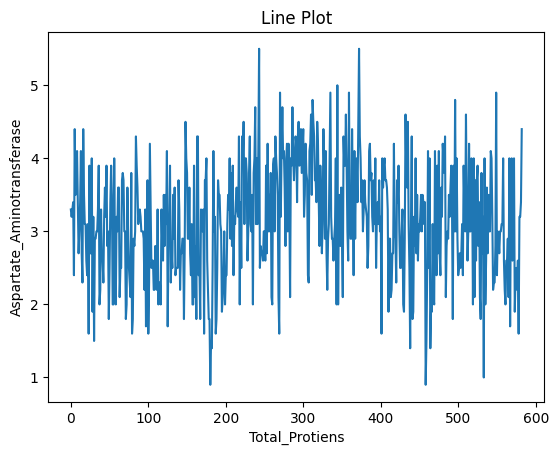

In [ ]:
import matplotlib.pyplot as plt

# Line plot
plt.plot(data['Albumin'])
plt.xlabel("Total_Protiens")
plt.ylabel("Aspartate_Aminotransferase")
plt.title("Line Plot")
plt.show()

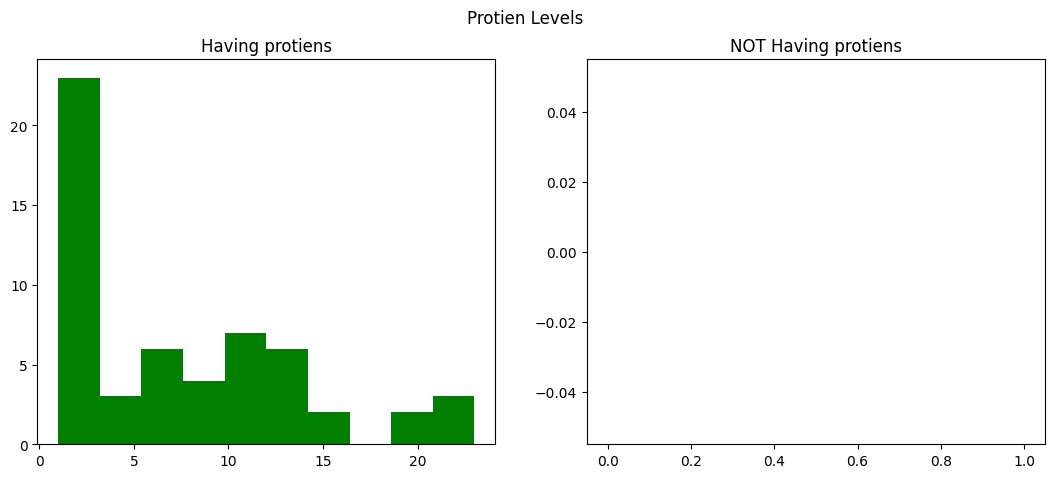

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['Dataset']==1]['Total_Protiens'].value_counts()

ax1.hist(data_len,color='green')
ax1.set_title('Having protiens')

data_len=data[data['Dataset']==0]['Total_Protiens'].value_counts()
ax2.hist(data_len,color='red')
ax2.set_title('NOT Having protiens')

fig.suptitle('Protien Levels')
plt.show()

In [ ]:
-data.duplicated()

0      True
1      True
2      True
3      True
4      True
       ... 
578    True
579    True
580    True
581    True
582    True
Length: 583, dtype: bool

In [ ]:
newdata=data.drop_duplicates()

In [ ]:
newdata

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Pre-Processing

In [ ]:
data.isnull().sum() #checking for total null values

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Normalization

In [ ]:
data[1:5]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Gender']
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' parameter removes one of the one-hot encoded columns to avoid multicollinearity
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
data = pd.concat([data, encoded_cols], axis=1)
data.drop(categorical_cols, axis=1, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [ ]:
data

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0,0.0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0,1.0
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0,1.0
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0,1.0
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
578,60.0,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2.0,1.0
579,40.0,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1.0,1.0
580,52.0,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1.0,1.0
581,31.0,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1.0,1.0


split into train and test in the ration 70:30



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Assuming 'target_column' is the name of your target variable
X_train, X_test, y_train, y_test = train_test_split(data, data['Dataset'], test_size=0.2, random_state=42)


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
feature_names = data.columns.tolist()

In [ ]:
feature_names

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset',
 'Gender_Male']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

# Assuming 'classification' is a variable containing the target column name
classification = 'Dataset'  # Replace with your actual target column name

# Select features (X) and target variable (y)
feature_columns = ['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Gender_Male']
X = data[feature_columns]
y = data[classification]

# Replace '\t?' with NaN
X.replace('\t?', np.nan, inplace=True)

# Convert columns to numeric (assuming that they are numeric features)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Evaluate the model
accuracy = metrics.accuracy_score(predictions, test_Y)
print('The accuracy of the Logistic Regression model is:', accuracy)

# Display the classification report
report = classification_report(test_Y, predictions)
print("Classification Report:\n", report)


The accuracy of the Logistic Regression model is: 0.7435897435897436
Classification Report:
               precision    recall  f1-score   support

         1.0       0.77      0.94      0.85        87
         2.0       0.50      0.17      0.25        30

    accuracy                           0.74       117
   macro avg       0.63      0.55      0.55       117
weighted avg       0.70      0.74      0.69       117



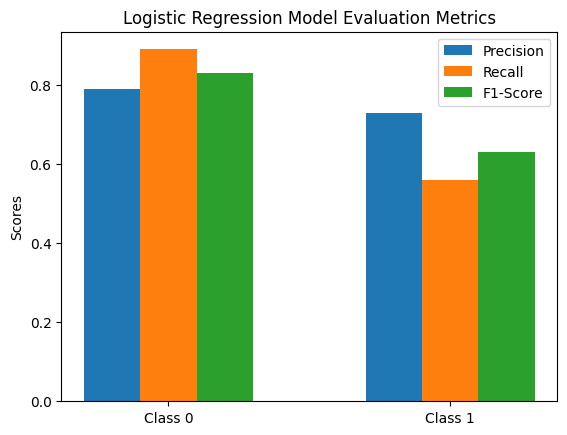

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual scores
precision = [0.79, 0.73]
recall = [0.89, 0.56]
f1_score = [0.83, 0.63]

labels = ['Class 0', 'Class 1']

# Plotting the bar chart
width = 0.2
x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Adding labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Logistic Regression Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()



In [ ]:
# Create and fit the Linear Regression model
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,classification_report # for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #logistic regression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

model = LinearRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
prediction = model.predict(test_X)

# Assuming 'test_Y' contains the true labels for the test set
# Calculate the accuracy
accuracy = accuracy_score(test_Y, prediction.round())

# Print the accuracy
print('The accuracy of Linear Regression is:', accuracy)
#Evaluate the model using various metrics
mse = mean_squared_error(test_Y,prediction)
rmse = mean_squared_error(test_Y,prediction,squared=False) #Caluclate the square root of mse
mae = mean_absolute_error(test_Y,prediction)
r_squared=r2_score(test_Y,prediction)

print('Mean squared error:',mse)
print('Root Mean squared error:',rmse)
print('Mean absolute error:',mae)
print('R-squared:',r_squared)

The accuracy of Linear Regression is: 0.7435897435897436
Mean squared error: 0.1707528200825014
Root Mean squared error: 0.41322248254723676
Mean absolute error: 0.3708038935779182
R-squared: 0.10443089880867396
